# Atividade 1 - SIN5016 Aprendizado de máquina
## Dataset Iris

Ministrada pelo prof. Clodoaldo A. M. Lima

Autor do notebook: Bruno Kemmer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import regressao_linear
import utils

# Regressão Linear

## Dataset:  Iris Data Set 

[fonte](https://archive.ics.uci.edu/ml/datasets/Iris?spm=a2c4e.11153940.blogcont603256.5.333b1d6f05ZggC)

Atributos:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

## Sem normalização

In [2]:
input_path='./data/iris.data'
d={"Iris-setosa":[1,0,0], "Iris-versicolor":[0,1,0],"Iris-virginica":[0,0,1]}

X, y = regressao_linear.obter_dataset(input_path, d)
# print(X[0:5, :])
# print(y[0:5])
print('Dimensão de X: ', np.shape(X))
print('Dimensão de : ', np.shape(y))

X_train, y_train, X_test, y_test = utils.divide_dataset(X, y)
print('Dimensão do treino e teste:', np.shape(X_train), np.shape(X_test))

w = regressao_linear.regressao_linear(X_train, y_train)
print('Dimensão de w: ', np.shape(w))

y_hat = regressao_linear.preditor_linear(w, X_test)
regressao_linear.acuracia(y_hat, y_test)

Dimensão de X:  (150, 5)
Dimensão de :  (150, 3)
Dimensão do treino e teste: (105, 5) (45, 5)
Dimensão de w:  (5, 3)
Acurácia: 0.84


# Análise exploratória

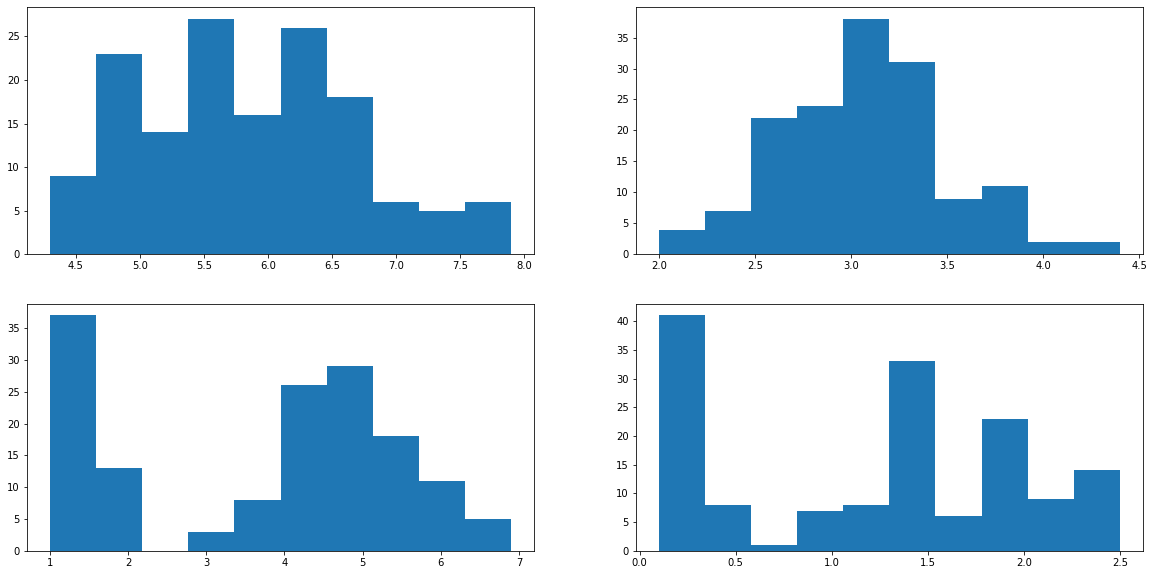

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs = np.reshape(axs, -1)
for i in range(1,5):
    axs[i-1].hist(X[:,i])

In [4]:
# Normalizando com z_score
X = utils.z_score(X, cols=[1, 2, 3, 4])
X_train, y_train, X_test, y_test = utils.divide_dataset(X, y)
w = regressao_linear.regressao_linear(X_train, y_train)
y_hat = regressao_linear.preditor_linear(w, X_test)
regressao_linear.acuracia(y_hat, y_test)

Acurácia: 0.84


## Dataset: Pima Indians Diabetes Database
[fonte](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
### Descrição:
O dataset consiste em diferentes variáveis preditoras médicas (independentes) e uma variável classe (dependente).
As variávies independentes incluem: número de gravidezes que o paciente teve, seu BMI, nível de insulina, idade entre outros.

### Atributos:

1. Pregnancies - Gravidezes - número de vezes em que a pessoa já engravidou
2. Glucose - Nível de glicose - concentração de de glicose no plasma em 2 horas em um teste de tolerância oral.
3. BloodPressure - Diastolic blood pressure (mm Hg) - Pressão sanguínea diastólica
4. SkinThickness - Triceps skin fold thickness (mm) - Grossura da pele via o quanto é possível dobrar do triceps
7. Insulin - Nível de insulina 2-Hour serum insulin (mu U/ml) - 
8. BMI - Body mass index - Índice de massa corporal
9. Age - Idade
10. Outcome - Variável classe (0 ou 1) - 268 de 768 exemplos são da classe 1, os outros são 0.


## Dataset: Hepatitis Data Set

[fonte](https://archive.ics.uci.edu/ml/datasets/Hepatitis)

- Número de instâncias: 155
- Tem valores faltantes: Sim
- Número de atributos: 19

## Atributos

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes